## Import

In [1]:
import numpy as np
import pandas as pd
import re as re
import nltk as nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
stop = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import words
from nltk.corpus import brown
from nltk import pos_tag
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
import xgboost as xgb
from sklearn.model_selection import train_test_split

## Importing dataset

In [2]:
file = pd.read_csv('globalenglish_essay_scoring.csv', encoding = 'latin1')

FileNotFoundError: File b'globalenglish_essay_scoring.csv' does not exist

In [3]:
file = file.drop(['rater1_domain1','rater2_domain1','essay_id'], axis = 1)

## Tokenizer function

In [4]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stop]
    return tokens

## Tokenizing essays

In [5]:
file['essay'] = [my_tokenizer(file['essay'][i]) for i in range(0,12978)]

## Extracting first feature: Essay words
 Number of words in essay is basic feature to determine whether length of essay is important criteria or not. 

In [6]:
a=file['essay'].apply(len)

In [7]:
file = pd.concat([file,a], axis=1)

In [8]:
file.columns=['essay_set','essay','domain1_score','essay_words']

## Extracting second feature: Average length of words

Avgerage length of words used in essay can be importanr in determining how big words student is using to demonstrate his ideas and his command on vocavulary.

In [9]:
essay_avg_word = [sum(len(i) for i in file['essay'][j]) for j in range(0,12978)]

In [10]:
c = [essay_avg_word[i]/file['essay_words'][i] for i in range(0,12978)]

In [11]:
c = pd.Series(c)

In [12]:
file = pd.concat([file,c],axis =1 )

In [13]:
file.columns= ['essay_set','essay','domain1_score','essay_words','essay_len_words']

## Extracting Third feature: Spelling mistakes.

By comparing words used in essay and lexicon like words we can find out spelling mistakes and how they are affecting score. But as there is collinearity in length of essay and number of spelling mistakes, I considered percentage of spelling misakes instead of number of spelling mistakes.

In [14]:
word_list= words.words()
word_set= set(word_list)

In [4]:
spell = file['essay'].apply(lambda x: ' '.join([word for word in x if word not in (word_set)]))

NameError: name 'file' is not defined

In [3]:
type(spell)

NameError: name 'spell' is not defined

In [16]:
df_2 = spell.apply(nltk.word_tokenize)

In [17]:
b=df_2.apply(len)

In [18]:
file = pd.concat([file,b], axis=1)

In [19]:
file.columns=['essay_set', 'essay', 'domain1_score', 'essay_words', 'essay_len_words','spell']

In [20]:
file['spell_check'] = file['spell']/file['essay_words']

In [21]:
file.drop(['spell'], axis =1, inplace = True)

In [22]:
file

,essay_set,essay,domain1_score,essay_words,essay_len_words,spell_check
0,1,"[dear, local, newspaper, think, effect, comput...",8.0,157,5.891720,0.184713
1,1,"[dear, caps1, caps2, believe, using, computer,...",9.0,218,5.623853,0.211009
2,1,"[dear, caps1, caps2, caps3, people, use, compu...",7.0,139,5.805755,0.158273
3,1,"[dear, local, newspaper, caps1, found, many, e...",10.0,299,6.180602,0.287625
4,1,"[dear, location1, know, computer, ha, positive...",8.0,223,5.802691,0.134529
5,1,"[dear, location1, think, computer, negative, a...",8.0,106,5.650943,0.198113
6,1,"[know, people, day, depending, computer, safet...",10.0,261,5.708812,0.107280
7,1,"[percent1, people, agree, computer, make, life...",10.0,252,5.821429,0.178571
8,1,"[dear, reader, organization1, ha, dramatic, ef...",9.0,225,5.506667,0.137778
9,1,"[location1, technology, computer, say, compute...",9.0,227,5.365639,0.202643


## Performing Pos_tag to find out number of different part of speeches used in essays

Considering percentage of adjectives, adpositions, nouns and verbs to determine essay quality. 

In [23]:
tags =[ ]
for i in range(0,12978):
    j = pos_tag(file['essay'][i], tagset='universal')
    tags.append(j)

In [24]:
count = Counter()

In [25]:
for i in range(0,12978):
    count[i] = Counter(tag for words,tag in tags[i])

In [26]:
df = pd.DataFrame(count)

In [27]:
df=df.transpose()

In [28]:
df.columns

Index(['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT',
       'VERB', 'X'],
      dtype='object')

In [29]:
df['ADJ'] = df['ADJ'] / file['essay_words']

In [30]:
df['ADV'] = df['ADV']/ file['essay_words']

In [31]:
df['ADP'] = df['ADP'] / file['essay_words']

In [32]:
df['CONJ'] = df['CONJ']/file['essay_words']

In [33]:
df['NOUN'] = df['NOUN'] / file['essay_words']

In [34]:
df['VERB'] = df['VERB']/ file['essay_words']

In [35]:
df = df[['ADJ','ADV','ADP','CONJ','NOUN','VERB']]

In [36]:
df = df.fillna(0)

In [37]:
file = pd.concat([file,df], axis =1)

## Model 1

For linear regression:
MAE: 0.6820531124959385
MSE: 0.7415031177083967
RMSE: 0.8611057529179542
0.6683636726856831
For XGBoost:
MAE: 0.6820531124959385
MSE: 0.7415031177083967
RMSE: 0.8611057529179542
0.7118395190594298


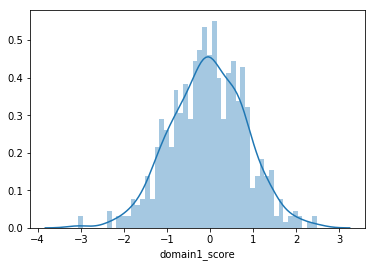

In [38]:
file_1 = file[file['essay_set']==1]
X_train, X_test, y_train, y_test = train_test_split(file_1[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_1['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)

print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 2

For linear regression:
MAE: 0.4260299982782179
MSE: 0.2863719759806134
RMSE: 0.5351373431004544
r2 score: 0.5321528963477115
For XGBoost:
MAE: 0.4260299982782179
MSE: 0.2863719759806134
RMSE: 0.5351373431004544
r2 score: 0.5296158936207838


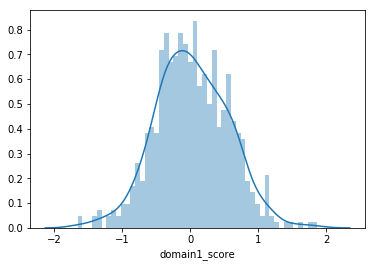

In [39]:
file_2 = file[file['essay_set']==2]
X_train, X_test, y_train, y_test = train_test_split(file_2[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_2['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)

print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 3

For linear regression:
MAE: 0.4538327340003828
MSE: 0.3306921505766769
RMSE: 0.5750583888412348
r2 score: 0.4791353345887921
For XGBoost:
MAE: 0.4538327340003828
MSE: 0.3306921505766769
RMSE: 0.5750583888412348
r2 score: 0.4769539308926286


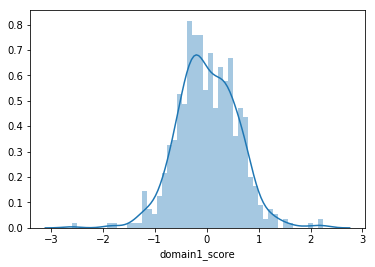

In [40]:
file_3= file[file['essay_set']==3]
X_train, X_test, y_train, y_test = train_test_split(file_3[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_3['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)

print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 4

For linear regression:
MAE: 0.49475817567032515
MSE: 0.4012396371086378
RMSE: 0.633434793099209
r2 score: 0.5571080028076907
For XGBoost:
MAE: 0.49475817567032515
MSE: 0.4012396371086378
RMSE: 0.633434793099209
r2 score: 0.577285517050055


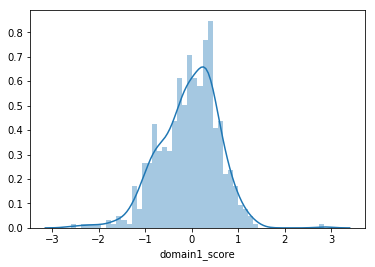

In [41]:
file_4 = file[file['essay_set']==4]
X_train, X_test, y_train, y_test = train_test_split(file_4[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_4['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train = y_train.fillna(0)
lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)

print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 5

For linear regression:
MAE: 0.4211544723735101
MSE: 0.2965573718703995
RMSE: 0.5445708143762384
r2 score: 0.66935163655611
For XGBoost:
MAE: 0.4211544723735101
MSE: 0.2965573718703995
RMSE: 0.5445708143762384
r2 score: 0.6823461320856226


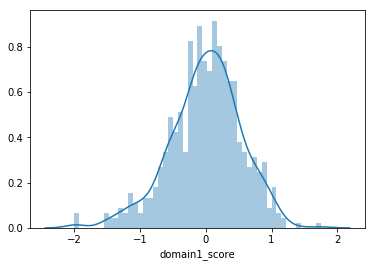

In [42]:
file_5 = file[file['essay_set']==5]
X_train, X_test, y_train, y_test = train_test_split(file_5[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_5['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)
print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 6

For linear regression:
MAE: 0.4996709568704728
MSE: 0.40111189549616105
RMSE: 0.6333339525843859
r2 score: 0.5694192767631204
For XGBoost:
MAE: 0.4996709568704728
MSE: 0.40111189549616105
RMSE: 0.6333339525843859
r2 score: 0.5803132974176897


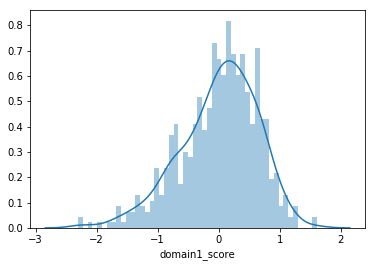

In [43]:
file_6 = file[file['essay_set']==6]
X_train, X_test, y_train, y_test = train_test_split(file_6[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_6['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)
print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 7

For linear regression:
MAE: 2.583739200521344
MSE: 10.238818787525934
RMSE: 3.1998154302281145
r2 score: 0.5171842117561478
For XGBoost:
MAE: 2.583739200521344
MSE: 10.238818787525934
RMSE: 3.1998154302281145
r2 score: 0.5834939347789111


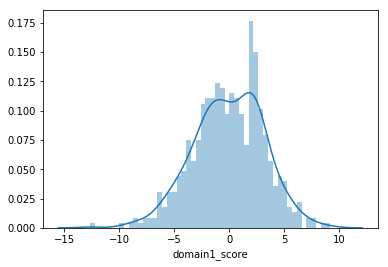

In [44]:
file_7 = file[file['essay_set']==7]
X_train, X_test, y_train, y_test = train_test_split(file_7[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_7['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)
print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Model 8

For linear regression:
MAE: 3.4648428312339283
MSE: 19.456024570731838
RMSE: 4.410898385899616
r2 score: 0.34289168523962876
For XGBoost:
MAE: 3.4648428312339283
MSE: 19.456024570731838
RMSE: 4.410898385899616
r2 score: 0.3124808687420557


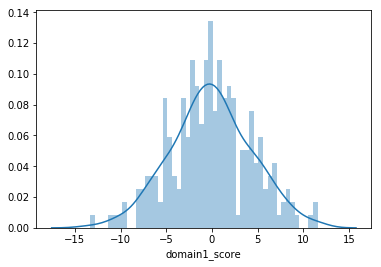

In [45]:
file_8 = file[file['essay_set']==8]
X_train, X_test, y_train, y_test = train_test_split(file_8[['essay_words','essay_len_words','spell_check','ADJ', 'ADV','ADP','CONJ','NOUN','VERB']], file_8['domain1_score'], test_size=0.33, random_state=42)
X_train.head()
y_train.head()

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions=lm.predict(X_test)
print('For linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('For XGBoost:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

sns.distplot(y_test-predictions, bins=50, kde=True)

## Overall Evaluation of models

I have applied linear regression and xgboost regrssion on all the models but there is tremendous diffefrence between obtained scores of models. Model1, model5, model6 worked significantly well than other models. That shows there are other factors which we should consider to get more accurate scores. 

## Future scope
There is tremendous future scope as analysis done at this stage is basic and factors considered are basic features. Building neural networks by using libraries like Pytorch, tensorflow will definitely give us better results.


## Thank You! This was a great learning experience.